In [9]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr

In [10]:
fname_co2_xz = 'co2.xz.nc'
fname_co2_xy = 'co2.xy.nc'

ds_co2_xz = nc.Dataset(fname_co2_xz)
ds_co2_xy = nc.Dataset(fname_co2_xy)

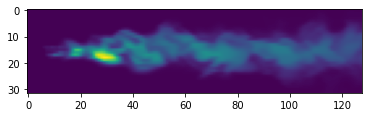

In [58]:
plt.imshow(ds_co2_xy['co2'][14,0,:,:])